<a href="https://colab.research.google.com/github/albinovik/non_opt_course/blob/main/%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BA%D0%B0%D0%BA_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BD%D0%B5%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%BA%D0%B8%D1%85_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка данных может быть осуществлена с различных источников, которые хранят данные в специальных форматах. Например, ниже представлена загрузка данных с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[Документация pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


# скачиваем и визуализируем данные

In [ ]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2022-10-13 15:06:55--  http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.252:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403974 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.34M   695KB/s    in 2.0s    

2022-10-13 15:06:57 (695 KB/s) - ‘weather.xls.gz’ saved [1403974/1403974]



In [ ]:
# Обновление библиотек
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Считываем Excel-таблицу в переменную data, удаляем первые 6 строк комментарией
data = pd.read_excel('weather.xls', skiprows=6)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [ ]:
# Распечатаем первые 6 строк таблицы
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,18.10.2021 18:00,4.1,743.6,757.4,0.4,86.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",17.0,1.9,3,12.0,NaN,NaN,NaN,NaN,2021-10-18 18:00:00
1,18.10.2021 15:00,6.1,743.2,756.9,0.2,63.0,"Ветер, дующий с запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 15:00:00
2,18.10.2021 12:00,5.1,743.0,756.7,1.3,85.0,"Ветер, дующий с запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,2.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 12:00:00
3,18.10.2021 09:00,5.8,741.7,755.5,-0.9,93.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,8.0,4.7,0.6,12.0,Поверхность почвы влажная.,4.0,NaN,NaN,2021-10-18 09:00:00
4,18.10.2021 06:00,6.2,742.6,756.3,-1.1,84.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-18 06:00:00
5,18.10.2021 03:00,7.1,743.7,757.3,-0.9,82.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 03:00:00
6,18.10.2021 00:00,6.7,744.6,758.3,-0.7,83.0,"Штиль, безветрие",0,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 00:00:00
7,17.10.2021 21:00,6.6,745.3,759.0,0.1,82.0,"Штиль, безветрие",0,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 21:00:00
8,17.10.2021 18:00,7.9,745.2,758.8,-0.4,76.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,3.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 18:00:00
9,17.10.2021 15:00,7.8,745.6,759.3,-0.6,73.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-17 15:00:00


In [ ]:
# Атрибут объекта - список колонок
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'date'],
      dtype='object')

Описание колонок данных:


```

T - температура воздуха (градусы Цельсия) на высоте 2м от поверхности земли
P0 - атмосферное давление на уровне станции (мм рт ст)
U - относительная влажность (%) на высоте 2м от поверхности земли
D0 - направлениеиветра (румбы) на высоте 10-12м, осреднённое за 10 мин период
N - общая облачность
Td - температура точки росы на высоте 2м (градусы Цельсия)
RRR - количество выпавших осадком (мм)
tR - количество времени (часы), за которое накоплено указанное кол-во осадков
sss - высота снежного покрова (см)


```



In [ ]:
# Pandas DataFrame (наша data) - это таблицы, которые хранятся по столбцам, 
# т.е. если мы хотим получить данные о температуре в строке 6, 
# мы в квадратных скобках пишем сначала название колонки, потом номер строки
print('Температура в строке 6 =', data['T'][6])
data['T']

Температура в строке 6 = 6.7


0         4.1
1         6.1
2         5.1
3         5.8
4         6.2
         ... 
16933   -15.0
16934   -14.8
16935   -14.6
16936   -14.0
16937   -12.9
Name: T, Length: 16937, dtype: float64

In [ ]:
data['Po']

0        743.6
1        743.2
2        743.0
3        741.7
4        742.6
         ...  
16933    763.2
16934    762.7
16935    762.4
16936    762.2
16937    762.2
Name: Po, Length: 16937, dtype: float64

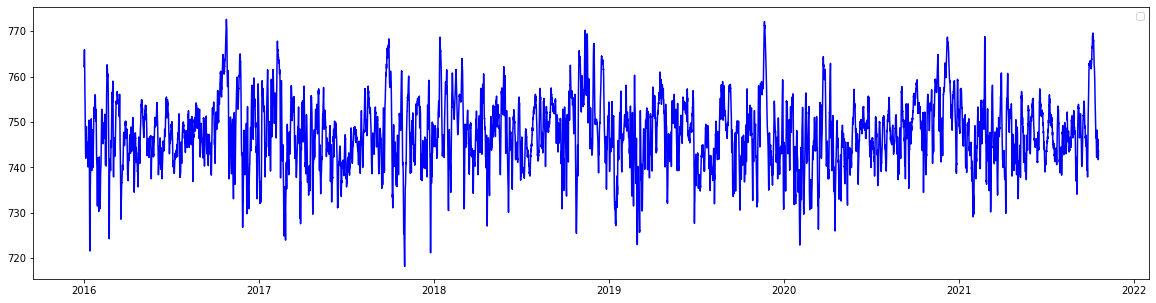

In [ ]:
# Строим график с помощью функции из библиотеки matplotlib (загрузили ее с коротким именем plt)
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['Po'], color='blue')
plt.legend()

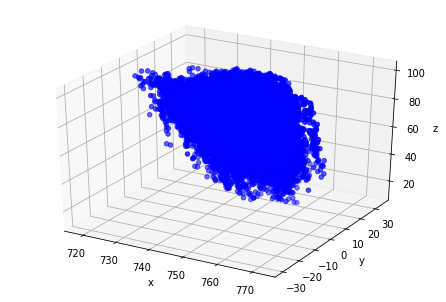

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x_data = data['Po']
y_data = data['T']
z_data = data['U']

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x_data, y_data, z_data, c='blue', label='data')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()